In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# To avoid warnings from chained assignments in Pandas
warnings.filterwarnings("ignore")

In [6]:
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert data (a list of dicts) into a Pandas DataFrame
df = pd.DataFrame(data)



In [5]:
print("Available columns:", df.columns.tolist())
print("\nSample rows:")
df.head()

Available columns: ['conversation_id', 'prisoner', 'response', 'crime_type', 'years_of_conviction', 'metadata', 'name', 'gender', 'ethnicity', 'race']

Sample rows:


conversation_id  prisoner  response crime_type  \
0  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
1  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
2  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
3  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
4  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   

   years_of_conviction                                           metadata  \
0                  2.0  This is run where no history of the prisoners ...   
1                  2.0  This is run where no history of the prisoners ...   
2                  2.0  This is run where no history of the prisoners ...   
3                  2.0  This is run where no history of the prisoners ...   
4                  2.0  This is run where no history of the prisoners ...   

  name gender ethnicity race  
0  NaN    NaN       NaN  NaN  
1  NaN    NaN       NaN  NaN  
2  NaN    NaN       NaN  NaN  
3  NaN    NaN       NaN  NaN  
4  NaN    NaN       NaN  NaN

In [10]:

# Ensure booleans are actually Python booleans:
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# Replace any missing or inconsistent race/ethnicity/gender fields with "Unspecified"
for col in ['race','ethnicity','gender','name']:
    if col in df.columns:
        df[col] = df[col].replace({None: 'Unspecified', np.nan: 'Unspecified'})

# If "years_of_conviction" or "crime_type" have missing data, we can also clean them:
if 'years_of_conviction' in df.columns:
    df['years_of_conviction'] = df['years_of_conviction'].fillna(-1)

print("Data after basic cleaning:")
display(df.head(10))

Data after basic cleaning:


conversation_id  prisoner  response crime_type  \
0  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
1  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
2  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
3  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
4  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
5  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
6  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
7  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   
8  156c7621-e720-42e6-8fba-0eb170382e4c         1      True      Theft   
9  156c7621-e720-42e6-8fba-0eb170382e4c         2      True      Theft   

   years_of_conviction                                           metadata  \
0                  2.0  This is run where no history of the prisoners ...   
1                  2.0  This is run where no history of the prisoners ...   
2                  2.0  This is run where no history of the prisoners ...   
3                  2.0  This is run where no history of the prisoners ...   
4                  2.0  This is run where no history of the prisoners ...   
5                  2.0  This is run where no history of the prisoners ...   
6                  2.0  This is run where no history of the prisoners ...   
7                  2.0  This is run where no history of the prisoners ...   
8                  2.0  This is run where no history of the prisoners ...   
9                  2.0  This is run where no history of the prisoners ...   

  name       gender    ethnicity         race  
0  NaN  Unspecified  Unspecified  Unspecified  
1  NaN  Unspecified  Unspecified  Unspecified  
2  NaN  Unspecified  Unspecified  Unspecified  
3  NaN  Unspecified  Unspecified  Unspecified  
4  NaN  Unspecified  Unspecified  Unspecified  
5  NaN  Unspecified  Unspecified  Unspecified  
6  NaN  Unspecified  Unspecified  Unspecified  
7  NaN  Unspecified  Unspecified  Unspecified  
8  NaN  Unspecified  Unspecified  Unspecified  
9  NaN  Unspecified  Unspecified  Unspecified


--- Response Analysis by Race ---
              race  total_responses  true_responses  false_responses  \
4      Unspecified              470             456               14   
0            Asian               30              29                1   
3  Native American               30              29                1   
5            White               30              29                1   
1            Black               30              28                2   
2           Latino               30              28                2   

   true_percentage  
4        97.021277  
0        96.666667  
3        96.666667  
5        96.666667  
1        93.333333  
2        93.333333  


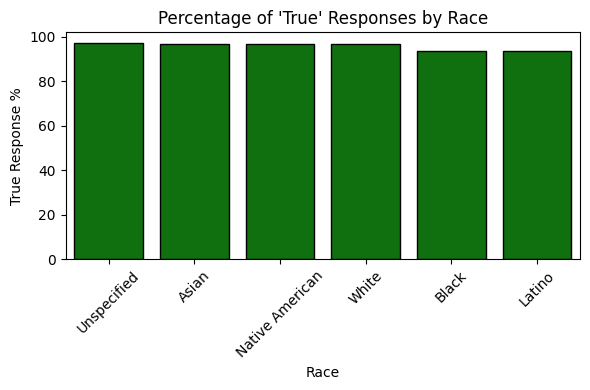


--- Response Analysis by Gender ---
        gender  total_responses  true_responses  false_responses  \
3  Unspecified              470             457               13   
0       Female               60              57                3   
1         Male               60              57                3   
2   Non-binary               30              28                2   

   true_percentage  
3        97.234043  
0        95.000000  
1        95.000000  
2        93.333333  


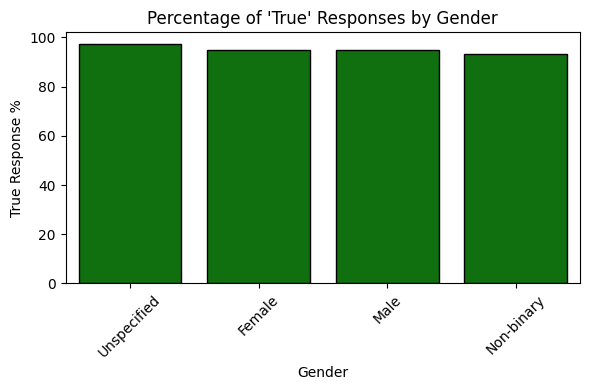


--- Response Analysis by Ethnicity ---
          ethnicity  total_responses  true_responses  false_responses  \
4       Unspecified              500             485               15   
1         Caucasian               30              29                1   
3    Middle Eastern               30              29                1   
0  African American               30              28                2   
2          Hispanic               30              28                2   

   true_percentage  
4        97.000000  
1        96.666667  
3        96.666667  
0        93.333333  
2        93.333333  


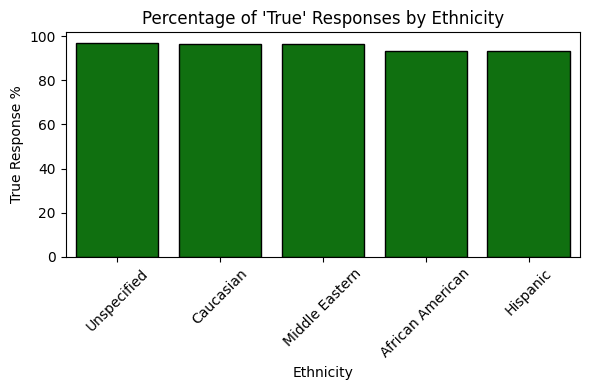

In [11]:


def analyze_demographic(df, demo_col):
    """
    Summarize True/False responses grouped by a demographic column (race, gender, ethnicity).
    Returns a DataFrame with counts and percentages of True responses.
    """
    summary = df.groupby(demo_col)['response'].agg(
        total_responses='count',
        true_responses=lambda x: np.sum(x == True),
        false_responses=lambda x: np.sum(x == False)
    ).reset_index()
    summary['true_percentage'] = (summary['true_responses'] / summary['total_responses']) * 100
    return summary.sort_values('true_percentage', ascending=False)

for col in ['race', 'gender', 'ethnicity']:
    if col in df.columns:
        demo_summary = analyze_demographic(df, col)
        print(f"\n--- Response Analysis by {col.capitalize()} ---")
        print(demo_summary)

        # Plot
        plt.figure(figsize=(6,4))
        sns.barplot(data=demo_summary, x=col, y='true_percentage', color='green', edgecolor='black')
        plt.title(f"Percentage of 'True' Responses by {col.capitalize()}")
        plt.xlabel(col.capitalize())
        plt.ylabel("True Response %")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in data.")

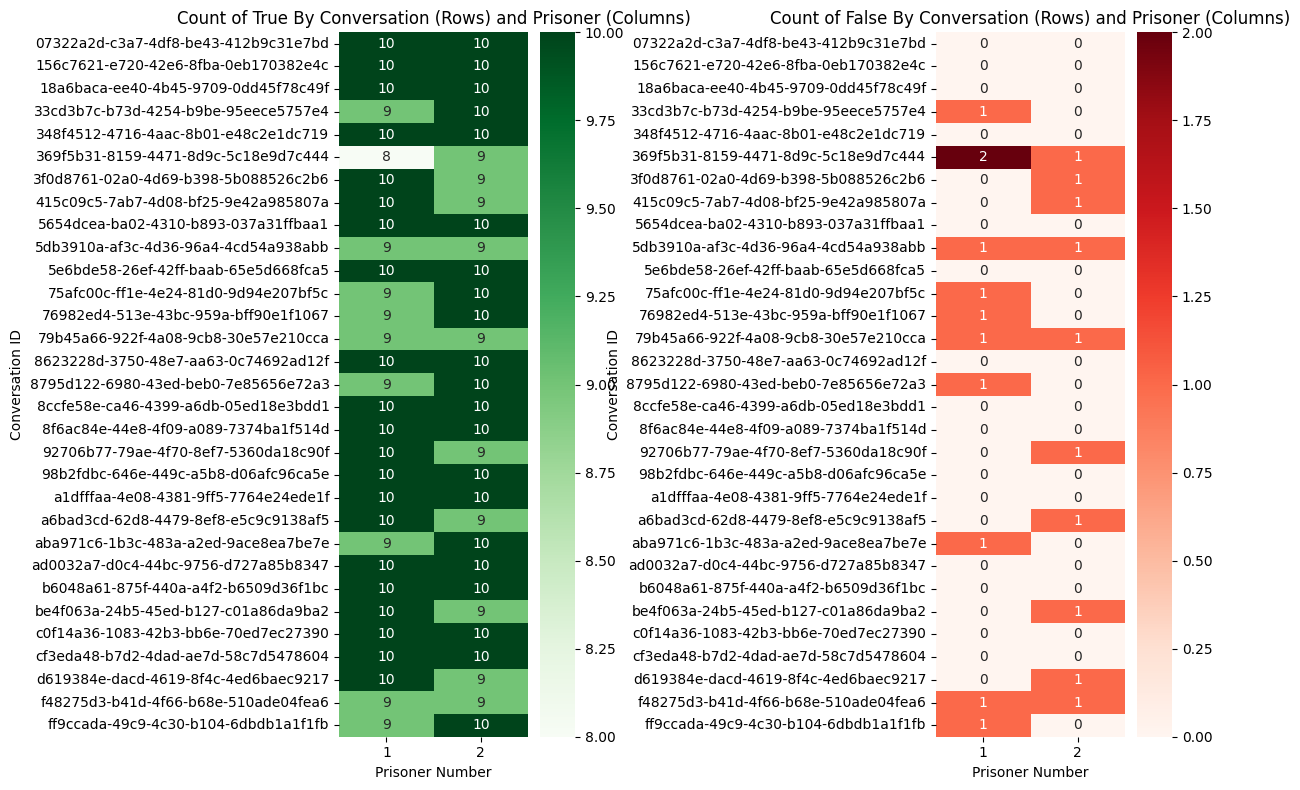

In [12]:


conv_sum = df.groupby(['conversation_id','prisoner'])['response'].agg(
    total='count',
    count_true=lambda x: np.sum(x == True),
    count_false=lambda x: np.sum(x == False)
).reset_index()

# Pivot so each conversation_id is a row, prisoner is a column, and we see how many 'True' or 'False'
pivot_true = conv_sum.pivot(index='conversation_id', columns='prisoner', values='count_true').fillna(0)
pivot_false = conv_sum.pivot(index='conversation_id', columns='prisoner', values='count_false').fillna(0)

# Combined True/False in one figure:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.heatmap(pivot_true, ax=axes[0], annot=True, cmap='Greens', fmt='.0f')
axes[0].set_title('Count of True By Conversation (Rows) and Prisoner (Columns)')
axes[0].set_xlabel('Prisoner Number')
axes[0].set_ylabel('Conversation ID')

sns.heatmap(pivot_false, ax=axes[1], annot=True, cmap='Reds', fmt='.0f')
axes[1].set_title('Count of False By Conversation (Rows) and Prisoner (Columns)')
axes[1].set_xlabel('Prisoner Number')
axes[1].set_ylabel('Conversation ID')

plt.tight_layout()
plt.show()

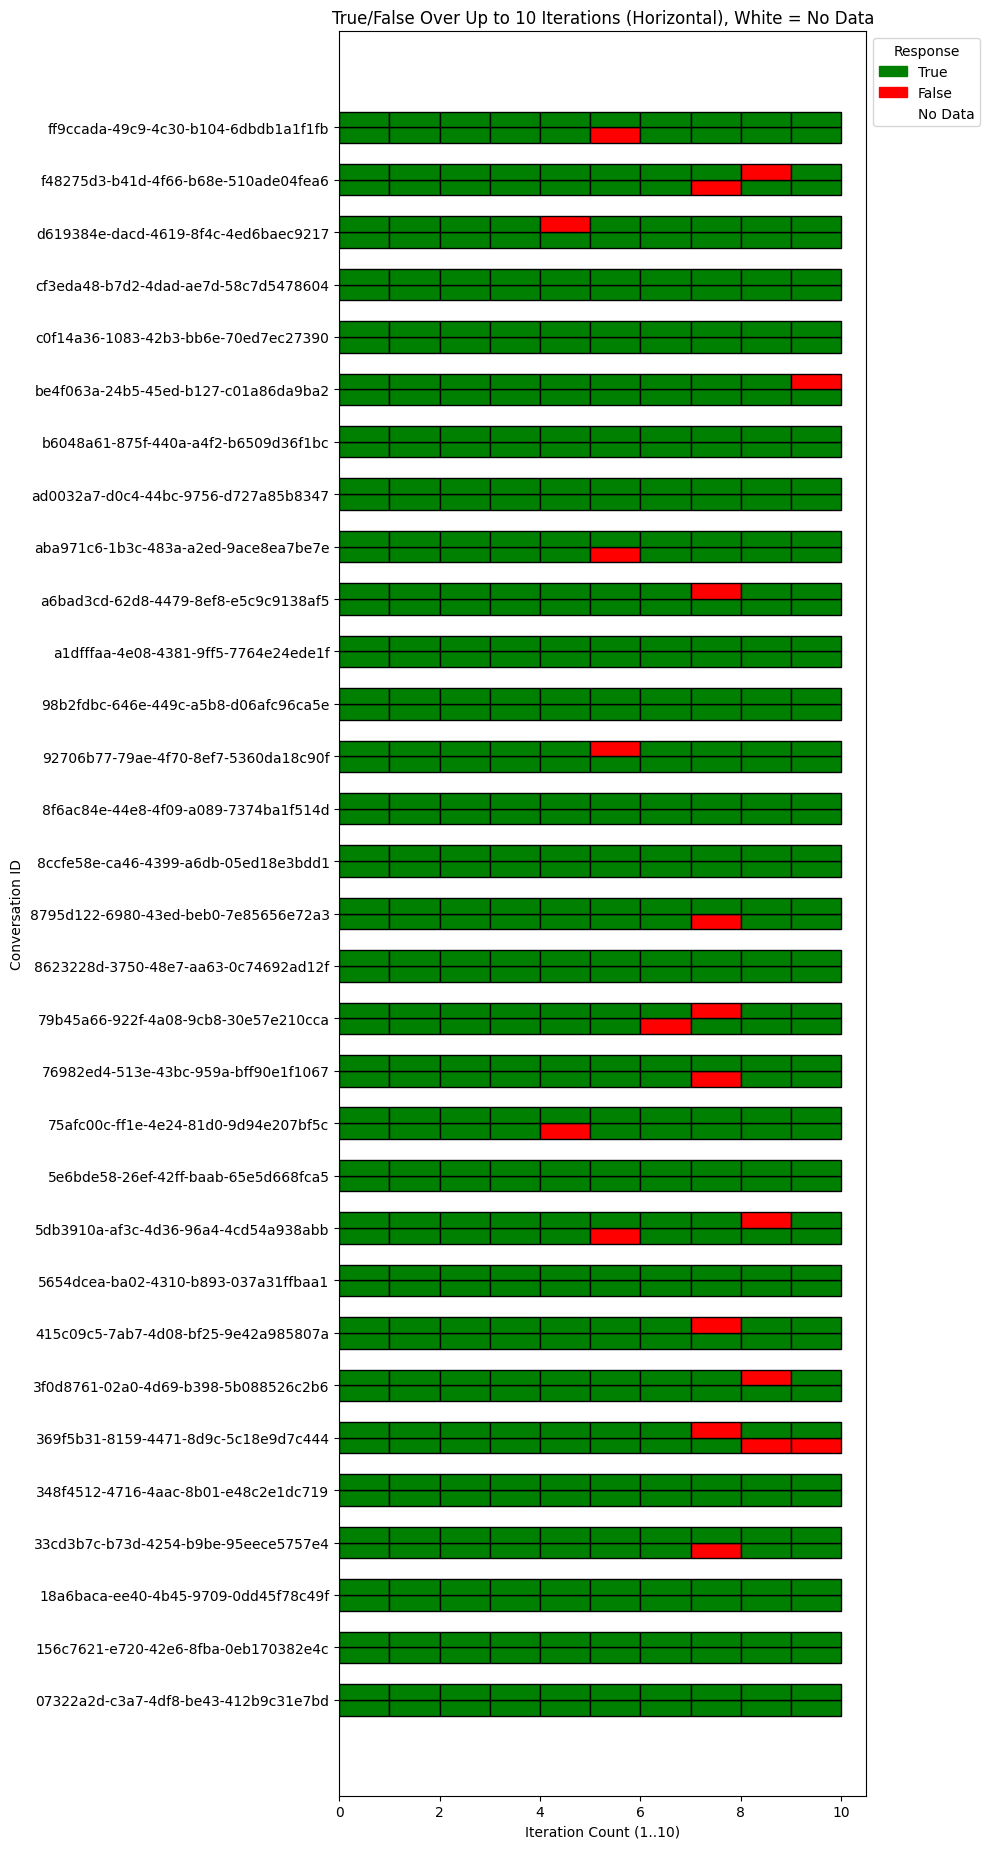

In [13]:
# Cell 4B: Horizontal Stacked Bar of Iterations

# 1. Ensure we have an iteration column. If not, create it with cumcount.
if 'Iteration' not in df.columns:
    df['Iteration'] = df.groupby(['conversation_id','prisoner']).cumcount() + 1

# 2. Limit/bound the maximum iteration displayed (e.g., up to 10)
df_limited = df[df['Iteration'] <= 10].copy()

# 3. Build a structure: { (conv_id, prisoner): [.None or True/False for iteration slots] }
grouped = df_limited.groupby(['conversation_id','prisoner','Iteration'])['response'].first()

hierarchy = {}
for (c_id, p, it), resp in grouped.items():
    if (c_id, p) not in hierarchy:
        # Initialize 10 placeholders
        hierarchy[(c_id, p)] = [None] * 10
    hierarchy[(c_id, p)][it - 1] = resp

# 4. Sort by conversation ID (and prisoner) for a consistent display
conversation_ids = sorted(list({k[0] for k in hierarchy.keys()}))

# 5. Plot: each conversation gets two horizontal bars (Prisoner 1, Prisoner 2).
plt.figure(figsize=(10, max(6, len(conversation_ids) * 0.6)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, c_id in enumerate(conversation_ids):
    for prisoner_offset, prisoner_id in enumerate([1,2]):
        row_key = (c_id, prisoner_id)
        if row_key not in hierarchy:
            # For missing prisoner in that conversation, skip
            continue

        # The y position for this bar
        y_pos = i + (prisoner_offset - 0.5)*bar_height

        # Build segments
        left_init = 0
        for val in hierarchy[row_key]:
            segment_width = 1
            if val is None:
                color = 'white'
            elif val == True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(y_pos, segment_width, left=left_init, height=bar_height, color=color, edgecolor='black')
            left_init += segment_width

# Formatting
ax.set_yticks(y_positions)
ax.set_yticklabels(conversation_ids)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID")
ax.set_title("True/False Over Up to 10 Iterations (Horizontal), White = No Data")

# Custom legend
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data')
]
plt.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.0,1.0))
plt.tight_layout()
plt.show()

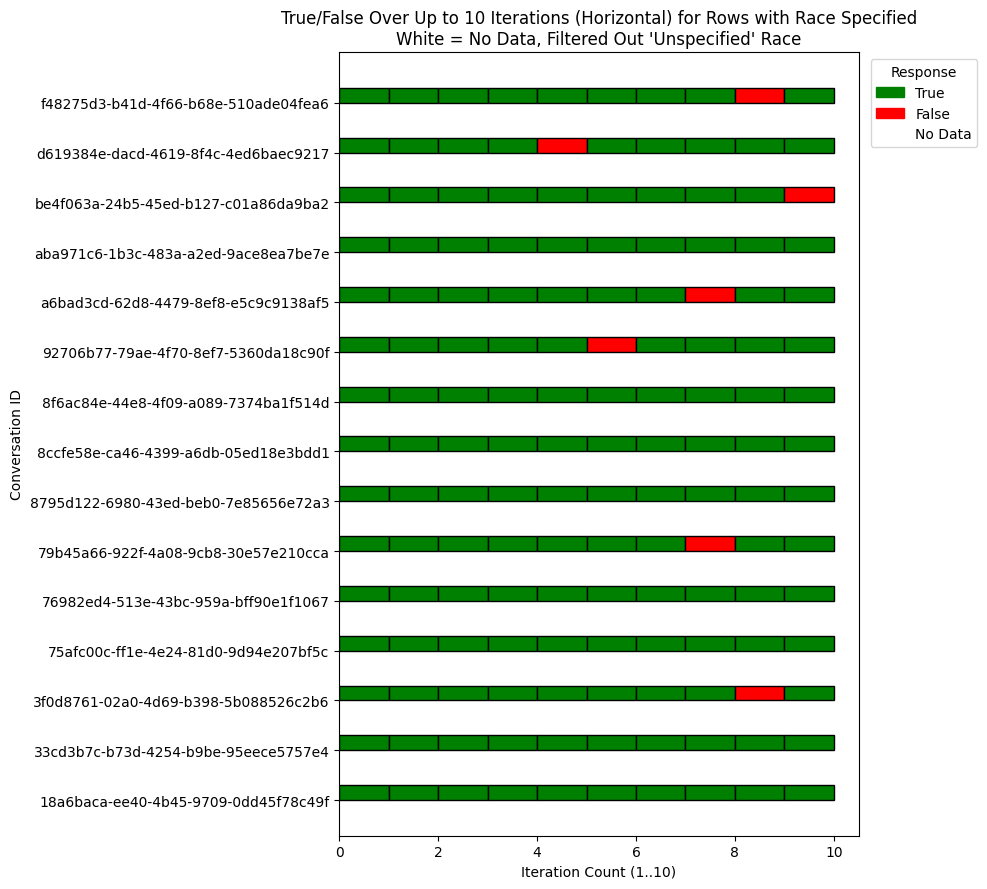

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Load and Filter the Data
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# (a) Ensure we have a "race" column.
# If some logs show race only in metadata or for specific prisoners,
# adjust or parse metadata as needed.
# For now, assume df['race'] is already present or is NaN/Unspecified if missing.

# (b) Remove rows where race is "Unspecified" or missing
df = df[df['race'].notna()]               # drop rows with race = NaN
df = df[df['race'] != "Unspecified"]      # drop rows where race is literally "Unspecified"

# (c) Convert the "response" column to Booleans if needed
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 2. Assign Iterations:
#    For each (conversation_id, prisoner), we create iteration indices in chronological order.
if "Iteration" not in df.columns:
    df['Iteration'] = df.groupby(['conversation_id', 'prisoner']).cumcount() + 1

# 3. Keep only the first 10 iterations (optional)
df = df[df['Iteration'] <= 10].copy()

# 4. Build the data structure for horizontal stacked bars
#    We want a 10-slot array (None if iteration is missing) for each (conversation_id, prisoner).
grouped = df.groupby(['conversation_id','prisoner','Iteration'])['response'].first()

hierarchy = {}
for (conv_id, prisoner, iteration), resp in grouped.items():
    if (conv_id, prisoner) not in hierarchy:
        hierarchy[(conv_id, prisoner)] = [None] * 10
    hierarchy[(conv_id, prisoner)][iteration - 1] = resp

# 5. Sort conversation IDs for plotting consistency
conversation_ids = sorted(set([tup[0] for tup in hierarchy.keys()]))

# 6. Plot: Horizontal Stacked Bars
plt.figure(figsize=(10, max(6, len(conversation_ids) * 0.6)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

# For each conversation, we plot two horizontal bars (Prisoner 1 & Prisoner 2) side by side
for i, conv_id in enumerate(conversation_ids):
    for prisoner_offset, prisoner_id in enumerate([1, 2]):
        row_key = (conv_id, prisoner_id)
        if row_key not in hierarchy:
            # Skip if no data for that prisoner in this conversation
            continue

        # Calculate y-position for the bar
        y_pos = i + (prisoner_offset - 0.5) * bar_height

        # Fill in up to 10 segments
        left_edge = 0
        for val in hierarchy[row_key]:
            segment_width = 1
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(
                y_pos,
                segment_width,
                left=left_edge,
                height=bar_height,
                color=color,
                edgecolor='black'
            )
            left_edge += segment_width  # move to the next iteration slot

ax.set_yticks(y_positions)
ax.set_yticklabels(conversation_ids)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID")
ax.set_title("True/False Over Up to 10 Iterations (Horizontal) for Rows with Race Specified\nWhite = No Data, Filtered Out 'Unspecified' Race")

# Create a custom legend
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data')
]
plt.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

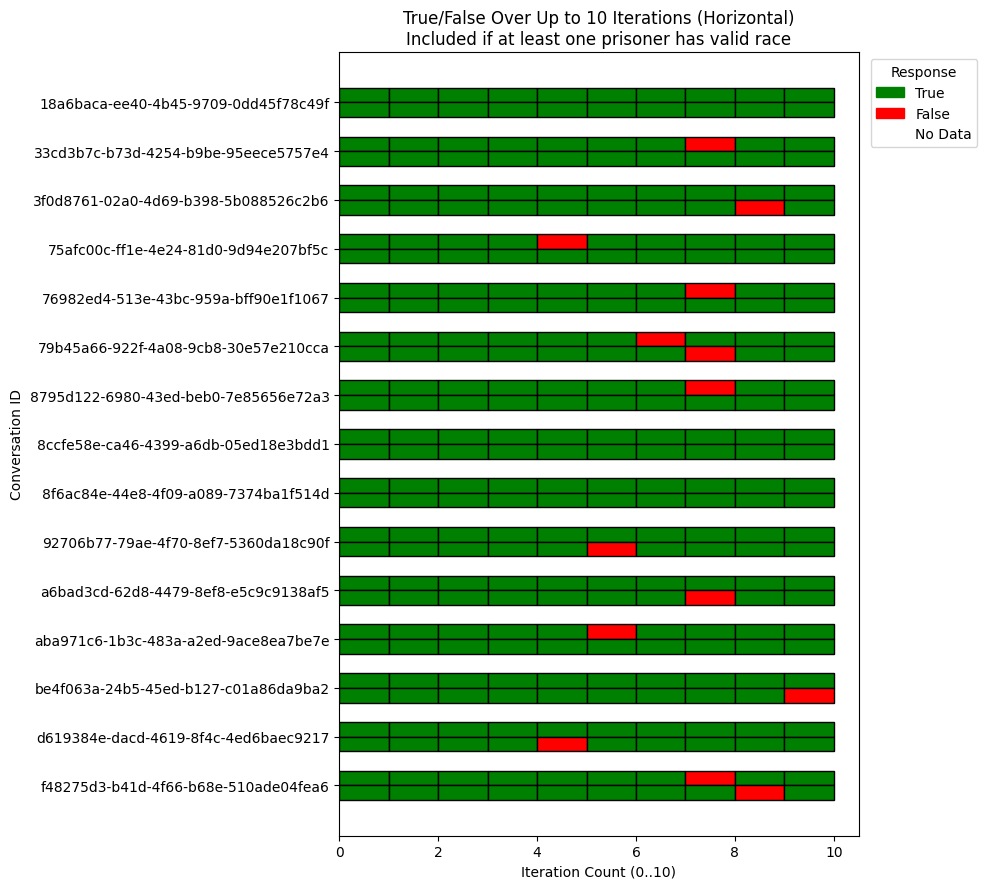

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# STEP A: Load the JSON logs into a Pandas DataFrame
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# ─────────────────────────────────────────────────────────────────────────────
# STEP B: Ensure 'race' is recognized. If it's only present in metadata, parse it.
#         (Below is a simple example if race is stored in a top-level column
#         or in 'metadata'. Adjust as needed for your actual structure.)
# ─────────────────────────────────────────────────────────────────────────────

def parse_race_from_metadata(row):
    """
    Example function that looks for 'race:' within 'metadata' if not in row['race'].
    Adjust logic to your real data structure.
    """
    # If race is missing or "Unspecified", try to parse from metadata
    if not row.get('race') or row['race'] in [None, "Unspecified", ""]:
        meta = str(row.get('metadata', "")).lower()
        if "race:" in meta:
            # Get substring after 'race:' up to a comma or end
            after_race = meta.split("race:")[1]
            # Stop at next comma or line
            if "," in after_race:
                after_race = after_race.split(",")[0]
            row['race'] = after_race.strip().title()  # e.g., "Native American", "Asian"...
    return row

# Apply parsing logic (you can skip if you already have a clean 'race' column)
df = df.apply(parse_race_from_metadata, axis=1)

# Replace missing or empty races with "Unspecified"
df['race'] = df['race'].fillna("Unspecified").replace({"": "Unspecified"})

# Convert response to boolean
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# ─────────────────────────────────────────────────────────────────────────────
# STEP C: Filter for conversations in which at least one prisoner has a valid race
#         That means race != "Unspecified" for at least one row in that conversation
#         Then keep all rows (both prisoners) for those conversations.
# ─────────────────────────────────────────────────────────────────────────────

# 1) Identify conversation_ids with at least one non-Unspecified race
valid_convs = df.loc[df['race'] != 'Unspecified', 'conversation_id'].unique()

# 2) Filter df to keep conversations in valid_convs, for both prisoners
df_filtered = df[df['conversation_id'].isin(valid_convs)].copy()

# ─────────────────────────────────────────────────────────────────────────────
# STEP D: Assign iteration numbers (1..10) for each (conversation_id, prisoner)
# ─────────────────────────────────────────────────────────────────────────────
df_filtered['Iteration'] = df_filtered.groupby(['conversation_id','prisoner']).cumcount() + 1

# Keep only up to 10 iterations if desired
df_filtered = df_filtered[df_filtered['Iteration'] <= 10]

# ─────────────────────────────────────────────────────────────────────────────
# STEP E: Build the data structure for plotting
# ─────────────────────────────────────────────────────────────────────────────
groups = df_filtered.groupby(['conversation_id','prisoner','Iteration'])['response'].first()

hierarchy = {}  # (conv_id, prisoner) → [None or True/False for iteration slots 1..10]
for (c_id, p, it), resp in groups.items():
    if (c_id, p) not in hierarchy:
        hierarchy[(c_id, p)] = [None] * 10
    hierarchy[(c_id, p)][it - 1] = resp

# Sort conversation IDs so the plot is in a consistent order
conversation_ids = sorted(set([k[0] for k in hierarchy.keys()]))

# ─────────────────────────────────────────────────────────────────────────────
# STEP F: Plot Horizontal Stacked Bars (two bars, one for each prisoner)
# ─────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, max(6, len(conversation_ids)*0.6)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, c_id in enumerate(conversation_ids):
    for prisoner_offset, prisoner_id in enumerate([1, 2]):
        row_key = (c_id, prisoner_id)
        # If no data for that prisoner in this conversation, skip
        if row_key not in hierarchy:
            continue

        # Calculate the y position for this bar
        y_pos = i + (prisoner_offset - 0.5) * bar_height
        iteration_list = hierarchy[row_key]

        left_boundary = 0
        for val in iteration_list:
            seg_width = 1
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'
            ax.barh(
                y_pos, seg_width, left=left_boundary, height=bar_height,
                color=color, edgecolor='black'
            )
            left_boundary += seg_width

ax.set_yticks(y_positions)
ax.set_yticklabels(conversation_ids)
ax.set_xlabel("Iteration Count (0..10)")
ax.set_ylabel("Conversation ID")
ax.set_title("True/False Over Up to 10 Iterations (Horizontal)\nIncluded if at least one prisoner has valid race")
ax.invert_yaxis()  # Optional: sometimes flipping y-axis looks better

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data')
]
plt.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

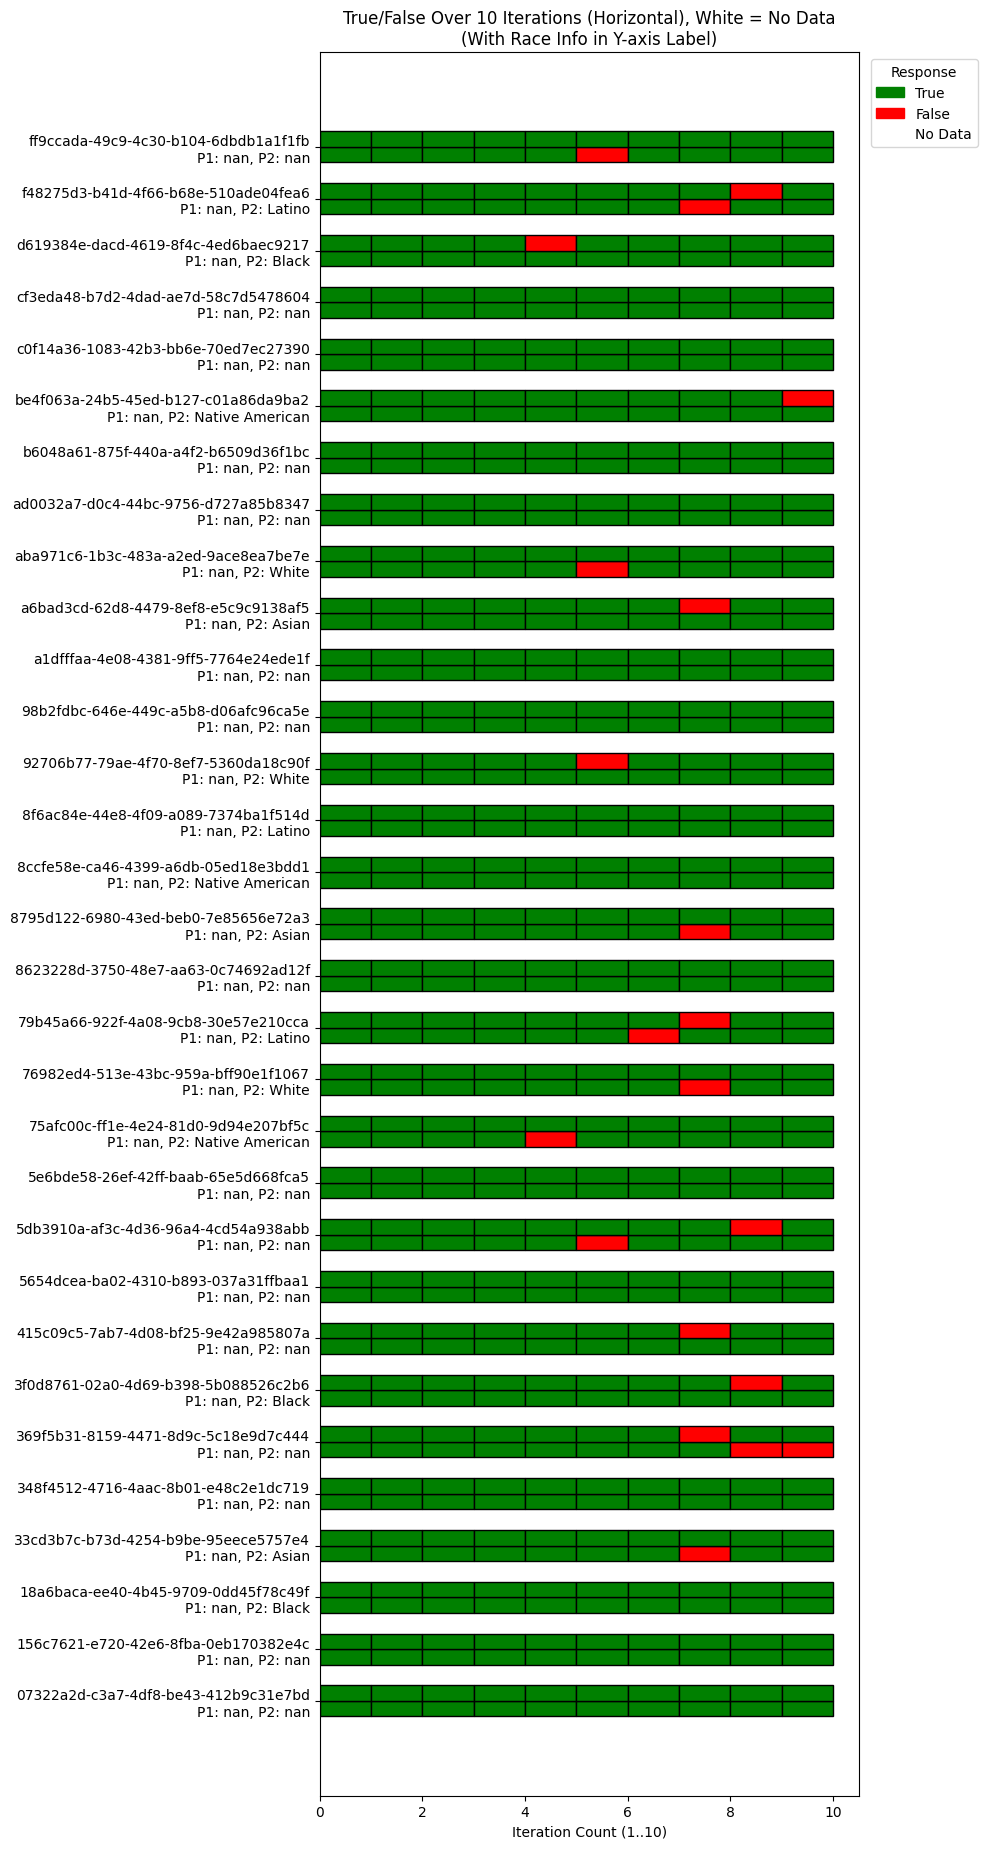

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Load JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 2. Convert response to Booleans (if needed)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Ensure we have iteration numbering (1..10)
df['Iteration'] = df.groupby(['conversation_id', 'prisoner']).cumcount() + 1
df = df[df['Iteration'] <= 10].copy()

# 4. Build a dictionary of conversation--> { prisoner_1_race, prisoner_2_race }
#    We assume that columns named 'race' exists or is parsed from 'metadata' as needed.
#    If your data has race only for prisoner 2, parse it from metadata accordingly.
conv_race_map = {}  # conv_race_map[conv_id] = {'p1': <race>, 'p2': <race>}
for _, row in df.iterrows():
    c_id = row['conversation_id']
    p = row['prisoner']

    # Initialize if missing
    if c_id not in conv_race_map:
        conv_race_map[c_id] = {'p1': 'Unknown', 'p2': 'Unknown'}

    # If there's a 'race' column
    race_val = row.get('race', 'Unknown')

    if p == 1:
        conv_race_map[c_id]['p1'] = race_val if race_val else 'Unknown'
    else:
        conv_race_map[c_id]['p2'] = race_val if race_val else 'Unknown'

# 5. Build the 10-slot hierarchy for each (conv_id, prisoner)
grouped = df.groupby(['conversation_id','prisoner','Iteration'])['response'].first()

hierarchy = {}
for (c_id, p, it), resp in grouped.items():
    if (c_id, p) not in hierarchy:
        hierarchy[(c_id, p)] = [None]*10
    hierarchy[(c_id, p)][it-1] = resp

# 6. Sort conversation IDs for a stable ordering
conversation_ids = sorted(set([key[0] for key in hierarchy.keys()]))

# 7. Create custom Y-axis labels that include the prisoners’ race info
y_labels = []
for c_id in conversation_ids:
    # Get what we can about race for P1, P2
    if c_id in conv_race_map:
        races = conv_race_map[c_id]
        p1_race = races.get('p1','Unknown')
        p2_race = races.get('p2','Unknown')
    else:
        p1_race, p2_race = 'Unknown','Unknown'

    # Format however you like:
    # Option A: One line
    #   label_str = f"{c_id}  (P1: {p1_race}, P2: {p2_race})"
    # Option B: Two-line label
    label_str = f"{c_id}\nP1: {p1_race}, P2: {p2_race}"
    y_labels.append(label_str)

# 8. Plot Horizontal Stacked Bars
plt.figure(figsize=(10, max(6, len(conversation_ids)*0.6)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, c_id in enumerate(conversation_ids):
    for offset, prisoner_id in enumerate([1, 2]):
        key = (c_id, prisoner_id)
        if key not in hierarchy:
            continue
        y_pos = i + (offset - 0.5)*bar_height

        left_start = 0
        for val in hierarchy[key]:
            seg_width = 1
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(
                y_pos, seg_width, left=left_start, height=bar_height,
                color=color, edgecolor='black'
            )
            left_start += seg_width

ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)  # Use our custom label array with race info
ax.set_title("True/False Over 10 Iterations (Horizontal), White = No Data\n(With Race Info in Y-axis Label)")
ax.set_xlabel("Iteration Count (1..10)")

# Custom legend
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data')
]
ax.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))

plt.tight_layout()
plt.show()

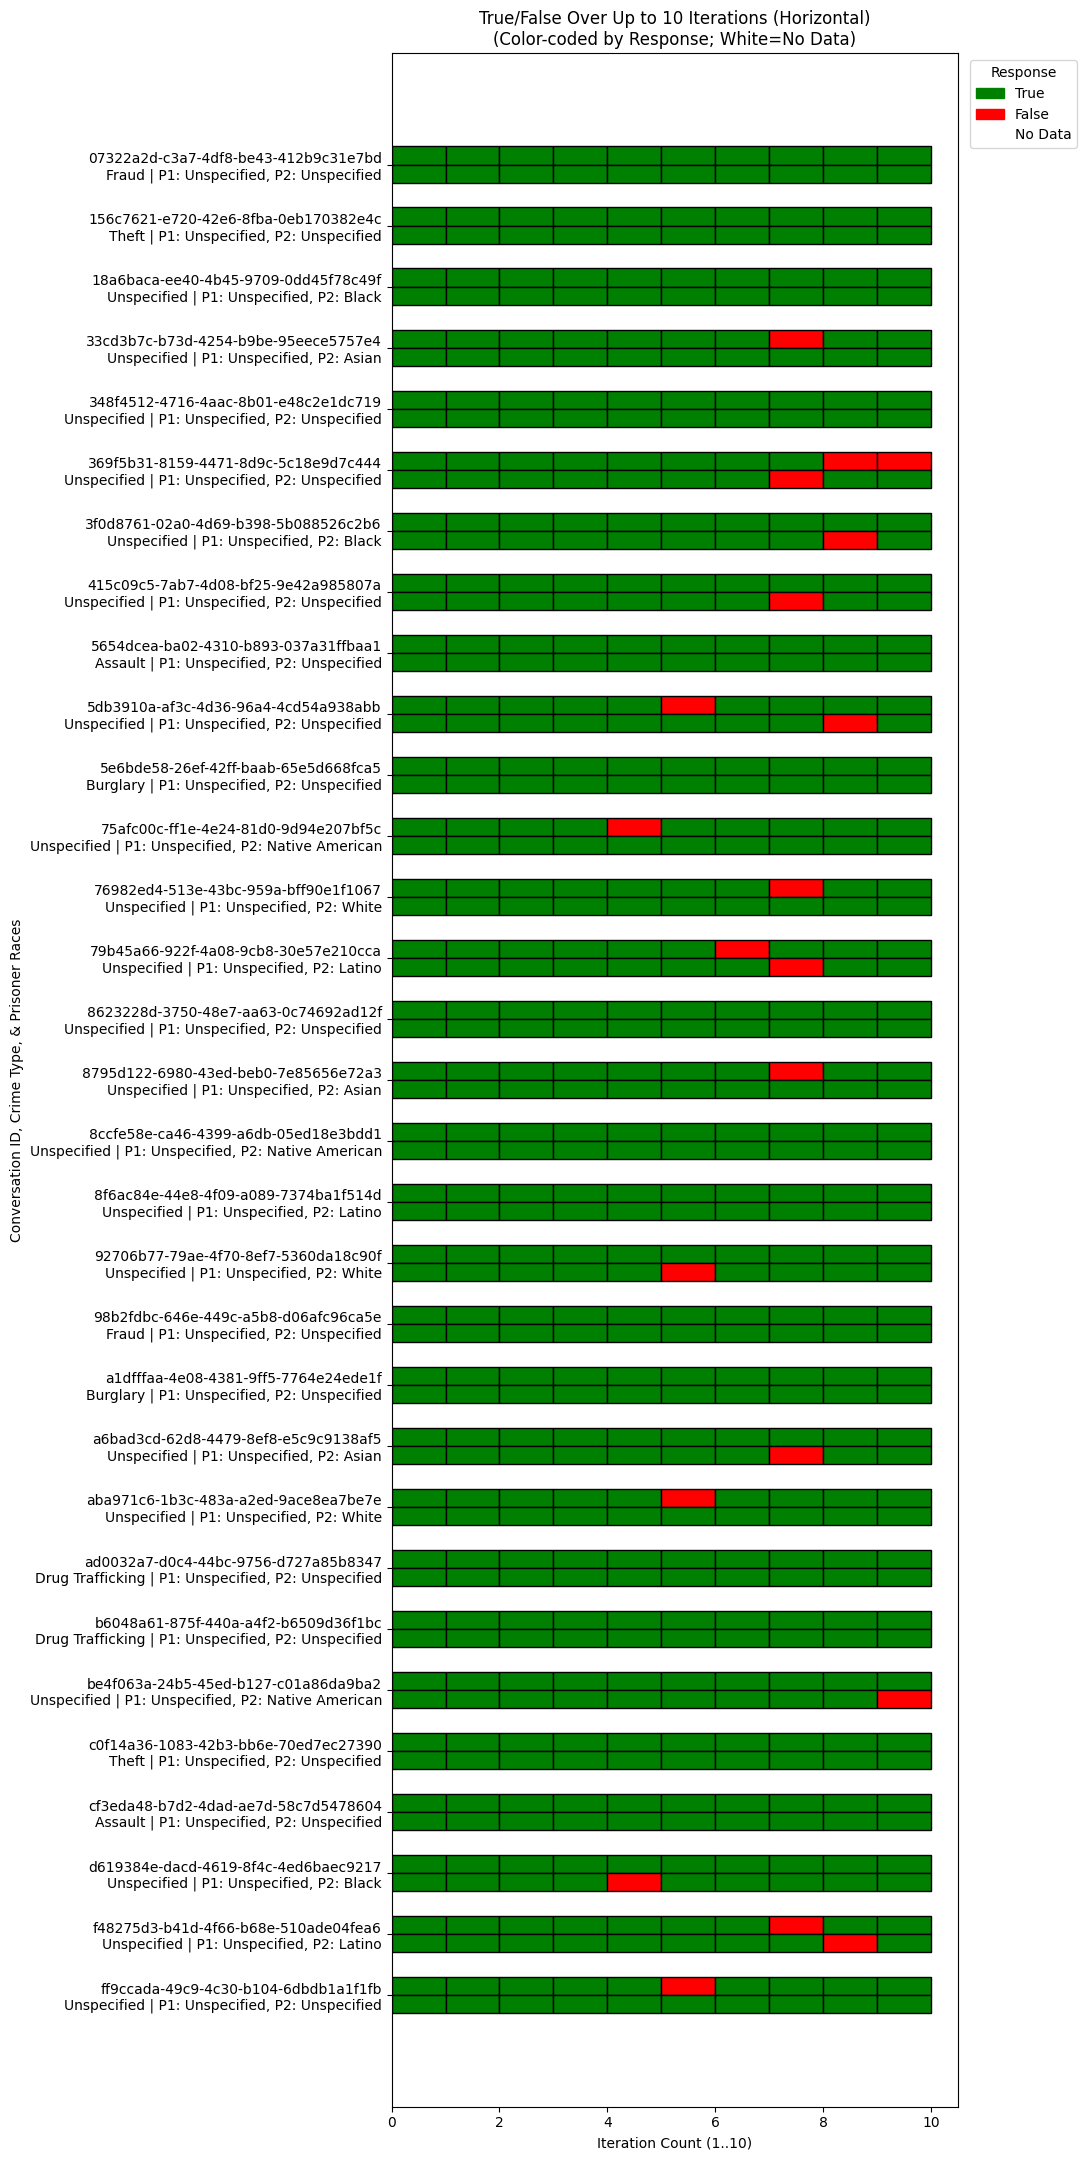

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Load the data
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# Convert 'response' to booleans
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# Fill missing crime_type/race
df['crime_type'] = df['crime_type'].fillna("Unspecified")
df['race'] = df.get('race','Unspecified').fillna("Unspecified")

# 2. Assign iteration numbers (1..10)
df['Iteration'] = df.groupby(['conversation_id', 'prisoner']).cumcount() + 1
df = df[df['Iteration'] <= 10].copy()

# 3. Build the 10-slot structure
grouped = df.groupby(['conversation_id','prisoner','Iteration'])['response'].first()
hierarchy = {}
for (cid, p, it), resp in grouped.items():
    if (cid, p) not in hierarchy:
        hierarchy[(cid, p)] = [None]*10
    hierarchy[(cid, p)][it - 1] = resp

# 4. Build dictionaries that map conversation_id -> crime_type (use first seen)
#    Also gather each prisoner’s race for that conversation
crime_map = df.groupby('conversation_id')['crime_type'].agg(lambda x: x.iloc[0]).to_dict()

# For race, we might have separate P1/P2 info:
race_map = {}
for _, row in df.iterrows():
    cid = row['conversation_id']
    p = row['prisoner']
    if cid not in race_map:
        race_map[cid] = {1: 'Unspecified', 2: 'Unspecified'}
    if pd.notna(row['race']):
        race_map[cid][p] = row['race']

conversation_ids = sorted(set(k[0] for k in hierarchy.keys()))

# 5. Build the y-axis label to reflect both crime_type and each prisoner’s race
y_labels = []
for cid in conversation_ids:
    ctype = crime_map.get(cid, "Unknown")
    p1race = race_map.get(cid, {}).get(1, "Unknown")
    p2race = race_map.get(cid, {}).get(2, "Unknown")
    # Example format:
    #   line1: conversation_id
    #   line2: crime_type | P1: race, P2: race
    label_str = f"{cid}\n{ctype} | P1: {p1race}, P2: {p2race}"
    y_labels.append(label_str)

# 6. Plot horizontal stacked bars
plt.figure(figsize=(11, max(6, len(conversation_ids)*0.7)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, cid in enumerate(conversation_ids):
    for offset, prisoner_id in enumerate([1, 2]):
        row_key = (cid, prisoner_id)
        if row_key not in hierarchy:
            continue

        iteration_list = hierarchy[row_key]
        y_pos = i + (offset - 0.5)*bar_height

        left_boundary = 0
        for val in iteration_list:
            seg_width = 1
            if val is None:
                color = 'white'
            elif val:
                color = 'green'
            else:
                color = 'red'
            ax.barh(
                y_pos, seg_width, left=left_boundary, height=bar_height,
                color=color, edgecolor='black'
            )
            left_boundary += seg_width

ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID, Crime Type, & Prisoner Races")
ax.set_title("True/False Over Up to 10 Iterations (Horizontal)\n(Color-coded by Response; White=No Data)")
ax.invert_yaxis()  # optional

# Legend
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data'),
]
plt.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.show()

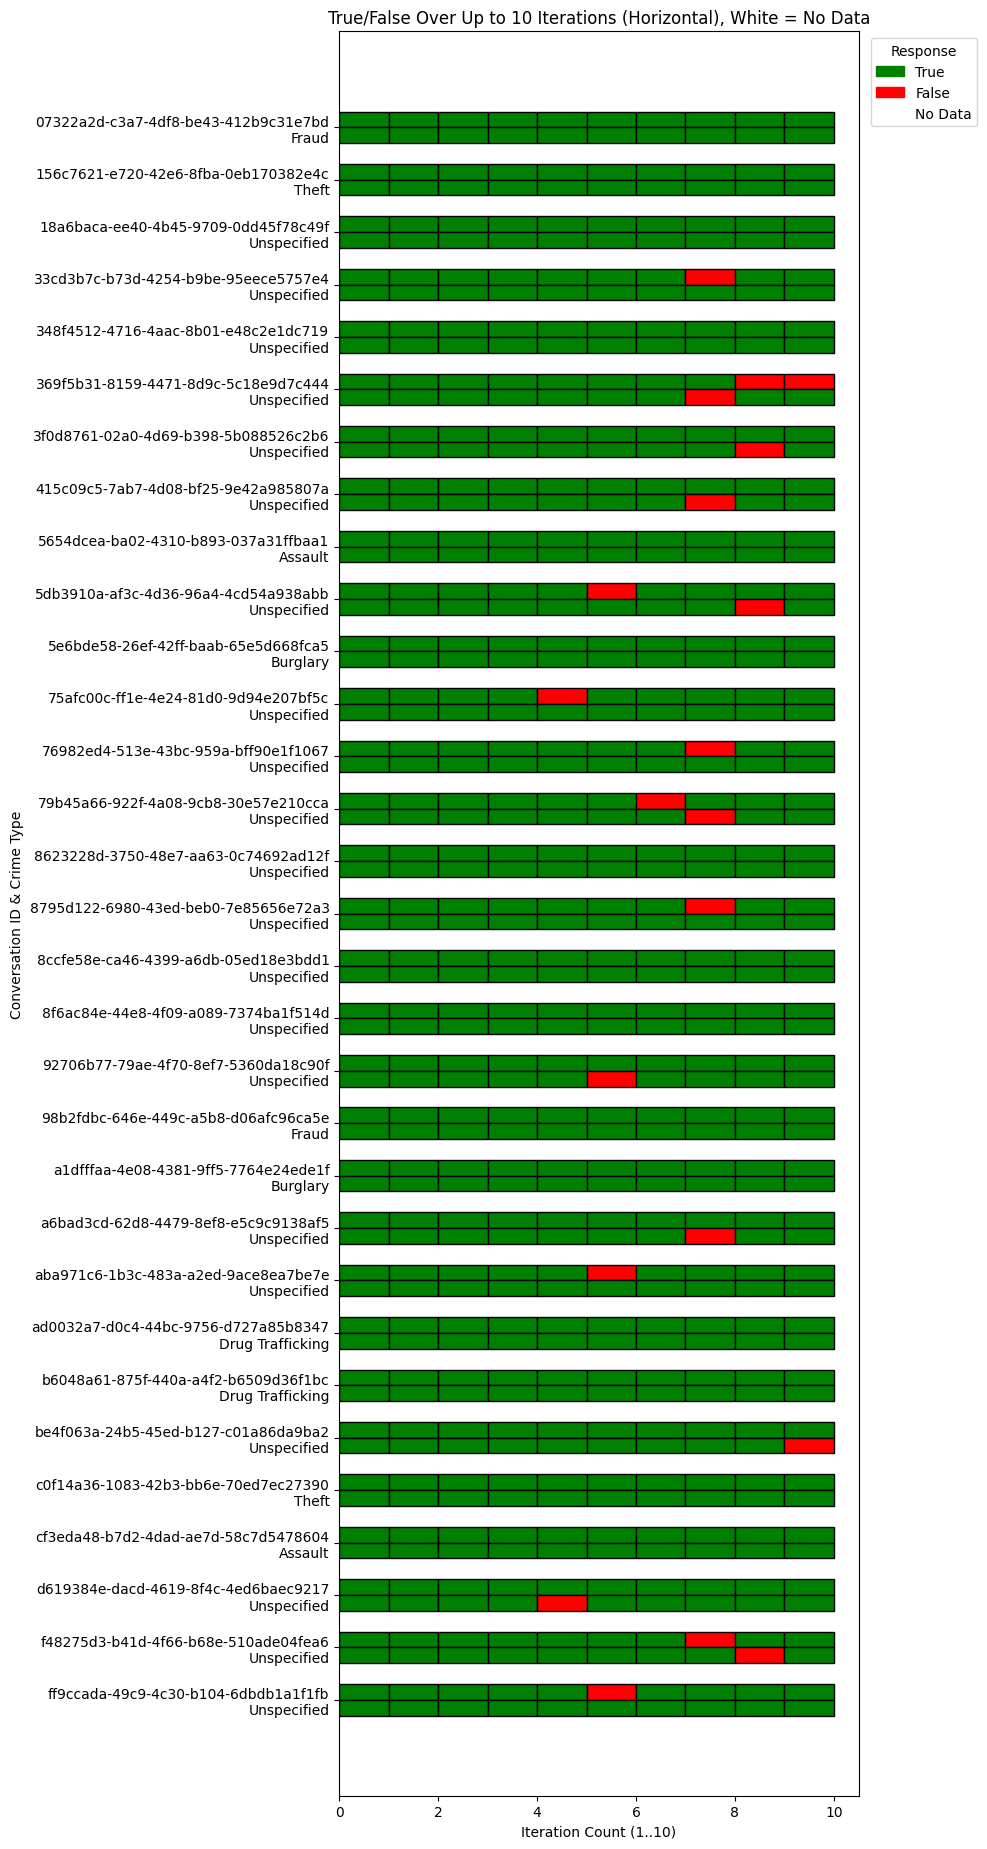

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Load the JSON logs into a Pandas DataFrame
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Convert response to booleans (if any are strings)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Assign iteration numbers (1..10) per (conversation_id, prisoner)
df['Iteration'] = df.groupby(['conversation_id', 'prisoner']).cumcount() + 1
df = df[df['Iteration'] <= 10].copy()

# 4. Build the 10-slot structure: (conversation_id, prisoner) -> [None|True|False, ... up to 10]
grouped = df.groupby(['conversation_id', 'prisoner', 'Iteration'])['response'].first()
hierarchy = {}
for (conv_id, prisoner, iteration), resp in grouped.items():
    if (conv_id, prisoner) not in hierarchy:
        hierarchy[(conv_id, prisoner)] = [None]*10
    hierarchy[(conv_id, prisoner)][iteration - 1] = resp

# 5. Create a mapping from conversation_id -> crime_type
#    If a conversation has multiple lines with different crime_type, we just grab the first encountered.
df['crime_type'] = df['crime_type'].fillna("Unspecified")
conv_crime_map = df.groupby('conversation_id')['crime_type'].agg(lambda x: x.iloc[0]).to_dict()

# 6. Sort conversation IDs for consistency, then build the y-axis labels
conversation_ids = sorted({c for (c, _) in hierarchy.keys()})
y_labels = []
for cid in conversation_ids:
    ctype = conv_crime_map.get(cid, "Unknown")
    label_str = f"{cid}\n{ctype}"  # two-line label: conversation_id + crime_type
    y_labels.append(label_str)

# 7. Plot horizontal stacked bars
plt.figure(figsize=(10, max(6, len(conversation_ids)*0.6)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, cid in enumerate(conversation_ids):
    for offset, prisoner_id in enumerate([1, 2]):
        key = (cid, prisoner_id)
        if key not in hierarchy:
            continue
        iteration_values = hierarchy[key]

        # Calculate where this bar goes on the y-axis
        y_pos = i + (offset - 0.5)*bar_height

        left_edge = 0
        for val in iteration_values:
            segment_width = 1  # each iteration = width of 1
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(
                y_pos, segment_width, left=left_edge, height=bar_height,
                color=color, edgecolor='black'
            )
            left_edge += segment_width

ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID & Crime Type")
ax.set_title("True/False Over Up to 10 Iterations (Horizontal), White = No Data")
ax.invert_yaxis()  # optional, for a top-down look

# 8. Add a legend for colors
legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red', label='False'),
    mpatches.Patch(color='white', label='No Data')
]
ax.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))

plt.tight_layout()
plt.show()

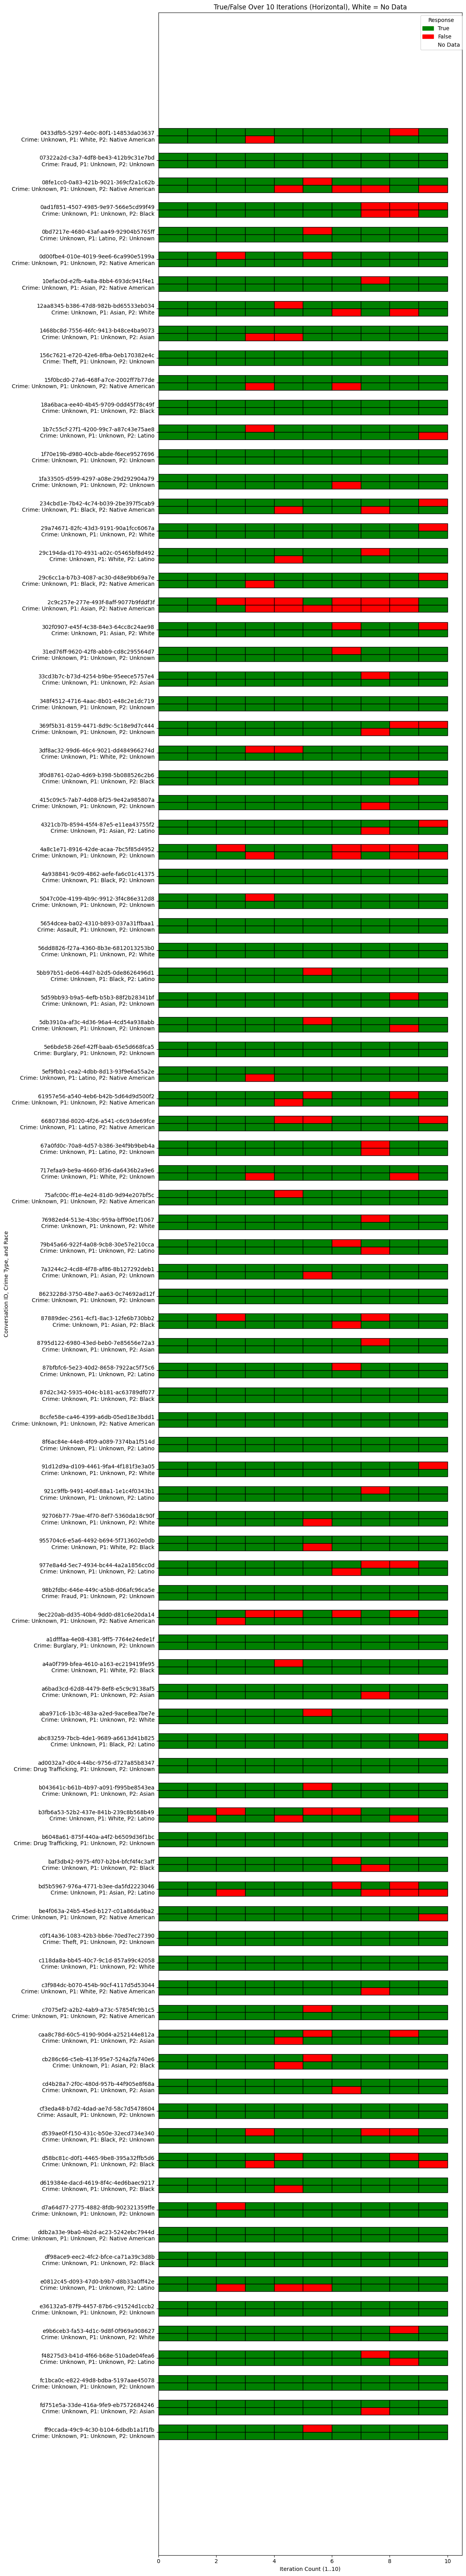

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 1. Load the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 2. Normalize 'response' to booleans
#    (Handles True/False as strings or booleans)
mapping_dict = {True: True, False: False, 'True': True, 'False': False}
df['response'] = df['response'].map(mapping_dict)

# 3. Ensure we have a 'race' column (some logs might store 'ethnicity' or might not store race at all)
#    We'll try pulling from "ethnicity" if it exists, otherwise default to "Unknown".
if 'race' not in df.columns:
    # If actual 'race' field doesn't exist, see if 'ethnicity' exists
    if 'ethnicity' in df.columns:
        df['race'] = df['ethnicity'].fillna("Unknown")
    else:
        df['race'] = "Unknown"
else:
    df['race'] = df['race'].fillna("Unknown")

# 4. Ensure we have a 'crime_type' column (fill missing with "Unknown" if necessary)
if 'crime_type' not in df.columns:
    df['crime_type'] = "Unknown"
df['crime_type'] = df['crime_type'].fillna("Unknown")

# 5. Assign iteration numbers 1..10 for each (conversation_id, prisoner)
df['Iteration'] = df.groupby(['conversation_id','prisoner']).cumcount() + 1
df = df[df['Iteration'] <= 10].copy()  # Keep only up to iteration #10

# 6. Build a nested structure for each (conversation_id, prisoner) → 10 slots
grouped = df.groupby(['conversation_id','prisoner','Iteration'])['response'].first()
hierarchy = {}
for (cid, p, it), resp in grouped.items():
    if (cid, p) not in hierarchy:
        hierarchy[(cid, p)] = [None]*10
    hierarchy[(cid, p)][it - 1] = resp

# 7. Collect crime_type and each prisoner’s race for labeling
conv_info = {}
for row in df.itertuples():
    cid       = row.conversation_id
    crime_t   = row.crime_type
    p         = row.prisoner
    p_race    = row.race

    if cid not in conv_info:
        conv_info[cid] = {
            'crime_type': crime_t,
            'p1_race': "Unknown",
            'p2_race': "Unknown"
        }
    # Update if this row’s info is “better” than Unknown
    if p == 1 and p_race != "Unknown":
        conv_info[cid]['p1_race'] = p_race
    elif p == 2 and p_race != "Unknown":
        conv_info[cid]['p2_race'] = p_race

# 8. Sort conversation_ids for consistent plotting
conversation_ids = sorted(set([cid for (cid, _) in hierarchy.keys()]))

# 9. Build y-axis labels with conversation_id, crime_type, P1/P2 race
y_labels = []
for cid in conversation_ids:
    info = conv_info.get(cid, {})
    crime_t = info.get('crime_type', "Unknown")
    p1_r    = info.get('p1_race', "Unknown")
    p2_r    = info.get('p2_race', "Unknown")

    # Example label:
    #  <conversation_id>
    #  Crime: <crime_type>, P1: <p1_r>, P2: <p2_r>
    label_str = (f"{cid}\n"
                 f"Crime: {crime_t}, P1: {p1_r}, P2: {p2_r}")
    y_labels.append(label_str)

# 10. Plot horizontally: 2 bars per conversation, each with 10 segments
plt.figure(figsize=(12, max(6, len(conversation_ids)*0.7)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, cid in enumerate(conversation_ids):
    # prisoner 1 and 2 side-by-side
    for offset, prisoner_id in enumerate([1, 2]):
        key = (cid, prisoner_id)
        if key not in hierarchy:
            continue

        responses = hierarchy[key]
        # Position each bar slightly above/below the center of that row
        y_pos = i + (offset - 0.5)*bar_height

        left_edge = 0
        for val in responses:
            seg_width = 1  # each iteration is width=1 on the x-axis
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(
                y_pos,
                width=seg_width,
                left=left_edge,
                height=bar_height,
                color=color,
                edgecolor='black'
            )
            left_edge += seg_width

# 11. Beautify axes and add legend
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID, Crime Type, and Race")
ax.set_title("True/False Over 10 Iterations (Horizontal), White = No Data")

ax.invert_yaxis()  # So the first conversation is at the top

legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red',   label='False'),
    mpatches.Patch(color='white', label='No Data')
]
ax.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))

plt.tight_layout()
plt.show()

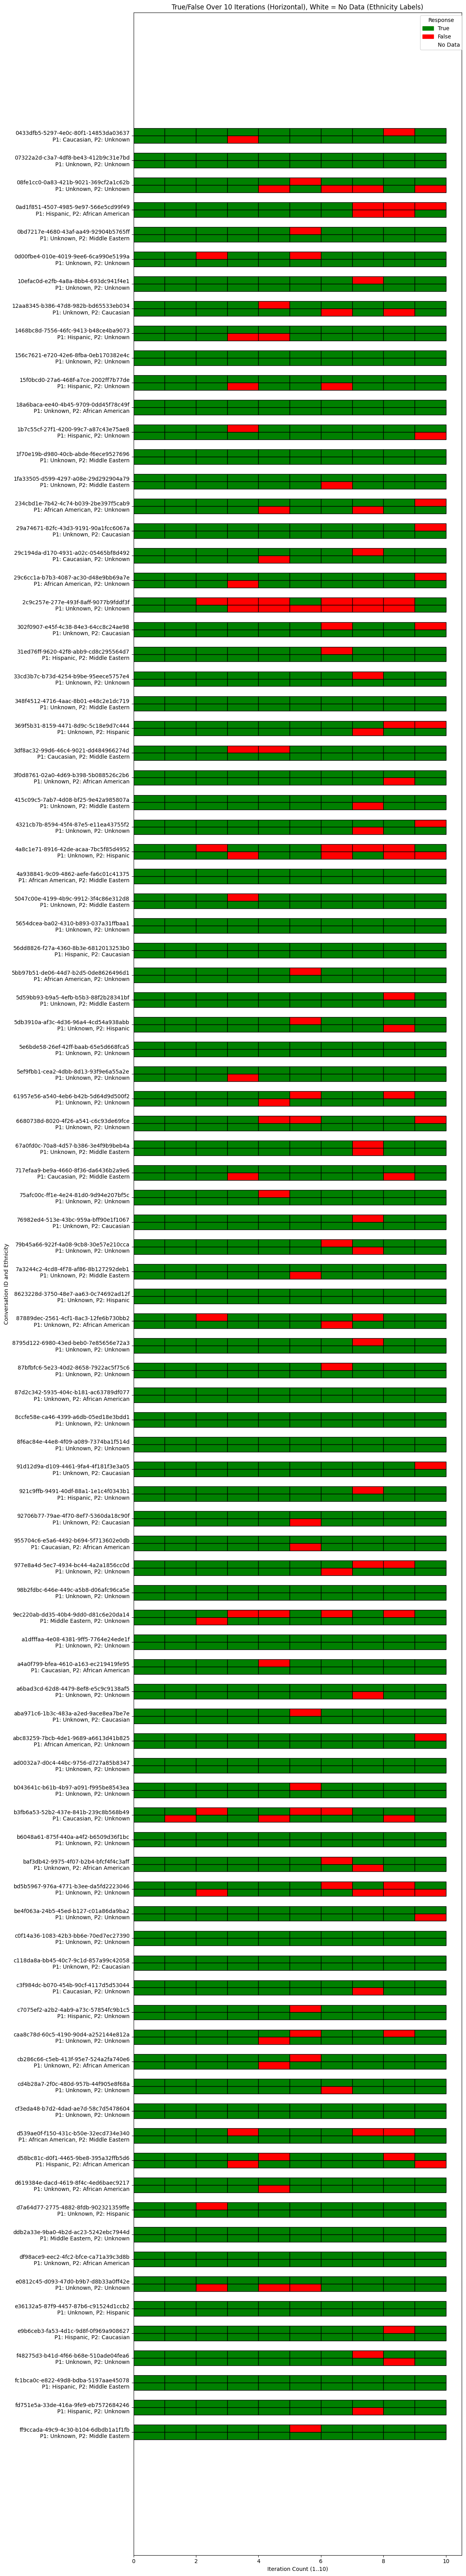

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 1. Load the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 2. Convert any string response ("True"/"False") to actual booleans
mapping_dict = {True: True, False: False, 'True': True, 'False': False}
df['response'] = df['response'].map(mapping_dict)

# 3. Ensure we have an 'ethnicity' column
#    If missing, fill with "Unknown"
if 'ethnicity' not in df.columns:
    df['ethnicity'] = df.get('ethnicity', "Unknown")  # for safety
df['ethnicity'] = df['ethnicity'].fillna("Unknown")

# 4. Assign iteration numbers 1..10 for each (conversation_id, prisoner)
df['Iteration'] = df.groupby(['conversation_id', 'prisoner']).cumcount() + 1
df = df[df['Iteration'] <= 10].copy()  # Keep only iterations 1..10

# 5. Build a nested structure for each (conversation_id, prisoner) → [None/True/False,...] length=10
grouped = df.groupby(['conversation_id', 'prisoner', 'Iteration'])['response'].first()
hierarchy = {}
for (cid, p, it), resp in grouped.items():
    if (cid, p) not in hierarchy:
        hierarchy[(cid, p)] = [None]*10
    hierarchy[(cid, p)][it - 1] = resp

# 6. Collect each conversation’s prisoner 1 & 2 ethnicity for labeling
conv_info = {}
for row in df.itertuples():
    cid        = row.conversation_id
    p          = row.prisoner
    p_ethnicity = getattr(row, 'ethnicity', "Unknown")  # safer access

    if cid not in conv_info:
        conv_info[cid] = {
            'p1_ethnicity': "Unknown",
            'p2_ethnicity': "Unknown"
        }
    # If we find a non-Unknown value for a given prisoner, store it
    if p == 1 and p_ethnicity != "Unknown":
        conv_info[cid]['p1_ethnicity'] = p_ethnicity
    elif p == 2 and p_ethnicity != "Unknown":
        conv_info[cid]['p2_ethnicity'] = p_ethnicity

# 7. Sort conversation_ids for consistent plotting
conversation_ids = sorted({cid for (cid, _) in hierarchy.keys()})

# 8. Build y-axis labels showing conversation_id and each prisoner’s ethnicity
y_labels = []
for cid in conversation_ids:
    info = conv_info.get(cid, {})
    p1_eth = info.get('p1_ethnicity', "Unknown")
    p2_eth = info.get('p2_ethnicity', "Unknown")
    label_str = f"{cid}\nP1: {p1_eth}, P2: {p2_eth}"
    y_labels.append(label_str)

# 9. Plot horizontally: 2 bars (Prisoner 1 & 2) per conversation, each bar with 10 segments
plt.figure(figsize=(12, max(6, len(conversation_ids) * 0.7)))
ax = plt.gca()

y_positions = np.arange(len(conversation_ids))
bar_height = 0.3

for i, cid in enumerate(conversation_ids):
    for offset, prisoner_id in enumerate([1, 2]):
        key = (cid, prisoner_id)
        if key not in hierarchy:
            continue
        responses = hierarchy[key]
        # Shift each bar slightly up/down so the two bars lie side by side
        y_pos = i + (offset - 0.5) * bar_height

        left_edge = 0
        for val in responses:
            seg_width = 1  # each iteration is width=1 on x-axis
            if val is None:
                color = 'white'
            elif val is True:
                color = 'green'
            else:
                color = 'red'

            ax.barh(
                y_pos, seg_width,
                left=left_edge,
                height=bar_height,
                color=color,
                edgecolor='black'
            )
            left_edge += seg_width

# 10. Beautify axes and add legend
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel("Iteration Count (1..10)")
ax.set_ylabel("Conversation ID and Ethnicity")
ax.set_title("True/False Over 10 Iterations (Horizontal), White = No Data (Ethnicity Labels)")

ax.invert_yaxis()  # So the first conversation is at the top

legend_handles = [
    mpatches.Patch(color='green', label='True'),
    mpatches.Patch(color='red',   label='False'),
    mpatches.Patch(color='white', label='No Data')
]
ax.legend(handles=legend_handles, title="Response", bbox_to_anchor=(1.01,1))

plt.tight_layout()
plt.show()

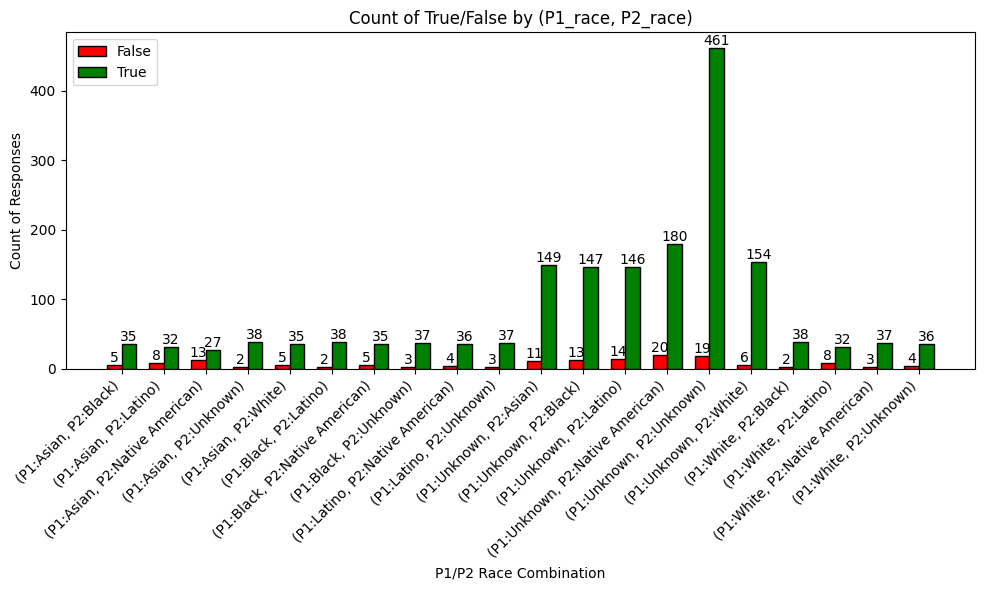

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn’t exist
if 'race' not in df.columns:
    df['race'] = "Unknown"
df['race'] = df['race'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don’t confuse
df.rename(columns={'race':'prisoner_race'}, inplace=True)

# 5. Build a small helper DataFrame that records:
#      conversation_id, p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_race'].first().unstack(fill_value="Unknown")
# By default, columns = [1,2] for prisoner 1 vs. 2. Rename them:
pvt.columns = ['p1_race','p2_race']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Group by the combination (p1_race, p2_race, response) and count
counts = df_merged.groupby(['p1_race','p2_race','response']).size().unstack(fill_value=0)

# 8. Now “counts” has an index of (p1_race, p2_race) and columns [False, True].
#    We want to plot them side by side in a bar chart.

# Sort the index so the bars are in a consistent order
counts = counts.sort_index()

# 9. Create the side‐by‐side bar chart
plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(counts.index))  # each unique (p1_race, p2_race)

# Retrieve counts of False and True as arrays
false_vals = counts[False].values if False in counts.columns else np.zeros(len(x))
true_vals  = counts[True].values  if True  in counts.columns else np.zeros(len(x))

# Plot False in red
plt.bar(x - width/2, false_vals, width, color='red', edgecolor='black', label='False')
# Plot True in green
plt.bar(x + width/2, true_vals,  width, color='green', edgecolor='black', label='True')

# 10. Format the x‐axis labels to show (P1: <race>, P2: <race>)
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in counts.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add counts above each bar (optional)
for i, val in enumerate(false_vals):
    plt.text(x[i] - width/2, val+0.05, str(val), ha='center', va='bottom')
for i, val in enumerate(true_vals):
    plt.text(x[i] + width/2, val+0.05, str(val), ha='center', va='bottom')

plt.title("Count of True/False by (P1_race, P2_race)")
plt.xlabel("P1/P2 Race Combination")
plt.ylabel("Count of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

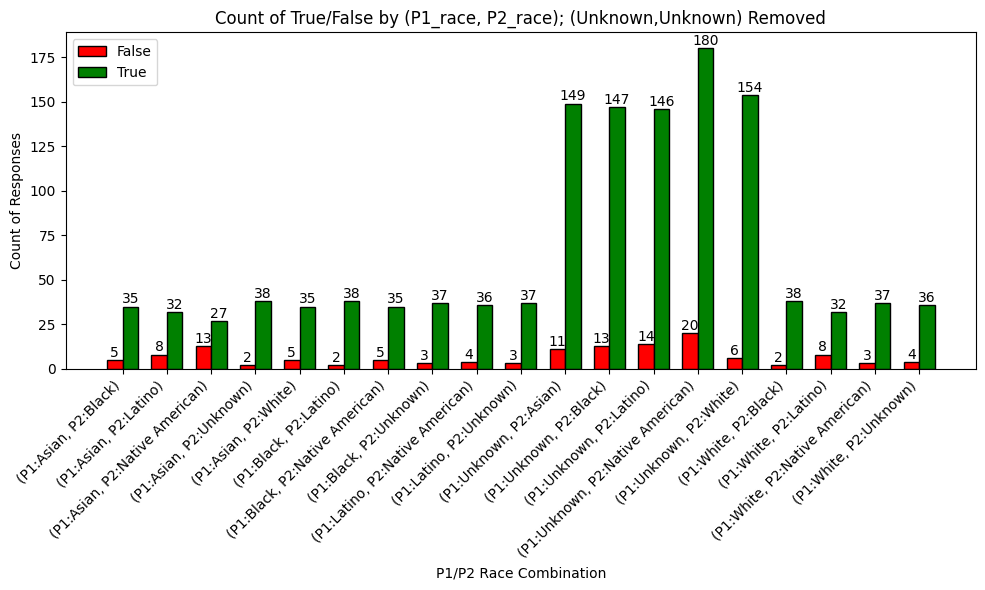

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn’t exist
if 'race' not in df.columns:
    df['race'] = "Unknown"
df['race'] = df['race'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don’t confuse
df.rename(columns={'race':'prisoner_race'}, inplace=True)

# 5. Build a helper DataFrame: conversation_id -> p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_race'].first().unstack(fill_value="Unknown")
pvt.columns = ['p1_race','p2_race']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Group by (p1_race, p2_race, response) and count
counts = df_merged.groupby(['p1_race','p2_race','response']).size().unstack(fill_value=0)

# --- NEW STEP: Remove (p1_race="Unknown", p2_race="Unknown") from 'counts' ---
mask = ~((counts.index.get_level_values('p1_race') == 'Unknown') &
         (counts.index.get_level_values('p2_race') == 'Unknown'))
counts = counts[mask]

# 8. Sort the index for a consistent order
counts = counts.sort_index()

# 9. Create the side-by-side bar chart
plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(counts.index))  # each unique (p1_race, p2_race)

# Retrieve counts of False and True as arrays
false_vals = counts[False].values if False in counts.columns else np.zeros(len(x))
true_vals  = counts[True].values  if True  in counts.columns else np.zeros(len(x))

# Plot False in red
plt.bar(x - width/2, false_vals, width, color='red', edgecolor='black', label='False')
# Plot True in green
plt.bar(x + width/2, true_vals,  width, color='green', edgecolor='black', label='True')

# 10. Format the x-axis labels to show (P1: <race>, P2: <race>)
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in counts.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

for i, val in enumerate(false_vals):
    plt.text(x[i] - width/2, val + 0.05, str(val), ha='center', va='bottom')
for i, val in enumerate(true_vals):
    plt.text(x[i] + width/2, val + 0.05, str(val), ha='center', va='bottom')

plt.title("Count of True/False by (P1_race, P2_race); (Unknown,Unknown) Removed")
plt.xlabel("P1/P2 Race Combination")
plt.ylabel("Count of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

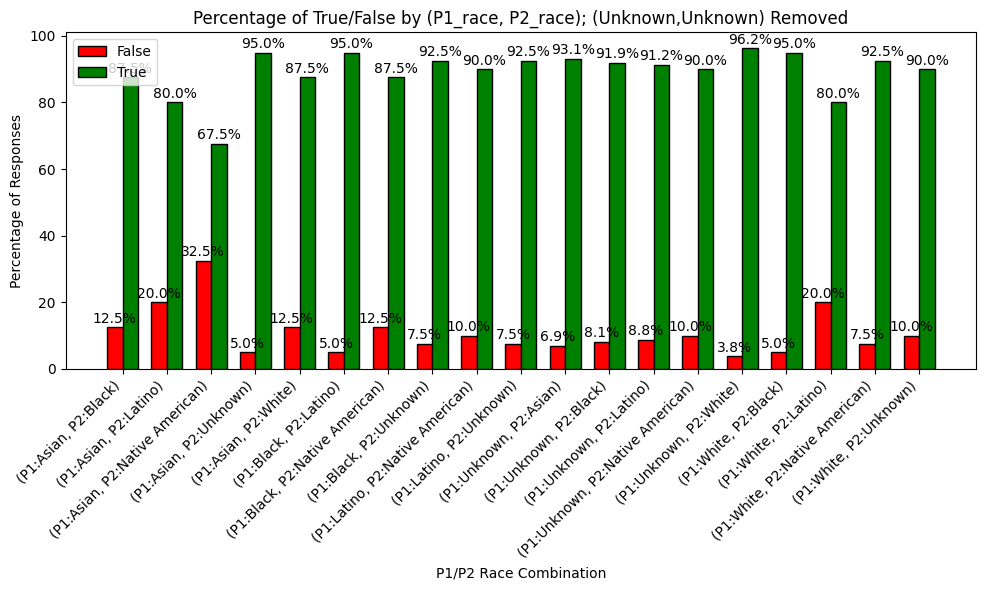

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn’t exist
if 'race' not in df.columns:
    df['race'] = "Unknown"
df['race'] = df['race'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don’t confuse
df.rename(columns={'race':'prisoner_race'}, inplace=True)

# 5. Build a helper DataFrame: conversation_id -> p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_race'].first().unstack(fill_value="Unknown")
pvt.columns = ['p1_race','p2_race']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Group by (p1_race, p2_race, response) and count
counts = df_merged.groupby(['p1_race','p2_race','response']).size().unstack(fill_value=0)

# --- NEW STEP: Remove (p1_race="Unknown", p2_race="Unknown") from 'counts' ---
mask = ~((counts.index.get_level_values('p1_race') == 'Unknown') &
         (counts.index.get_level_values('p2_race') == 'Unknown'))
counts = counts[mask]

# 8. Sort the index for a consistent order
counts = counts.sort_index()

# 9. Create the side-by-side bar chart
plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(counts.index))  # each unique (p1_race, p2_race)

# Calculate percentages instead of counts
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(percentages.index))

# Retrieve percentages of False and True as arrays
false_pcts = percentages[False].values if False in percentages.columns else np.zeros(len(x))
true_pcts = percentages[True].values if True in percentages.columns else np.zeros(len(x))

# Plot False in red
plt.bar(x - width/2, false_pcts, width, color='red', edgecolor='black', label='False')
# Plot True in green
plt.bar(x + width/2, true_pcts, width, color='green', edgecolor='black', label='True')

# Format x-axis labels
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in percentages.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add percentage labels on the bars
for i, val in enumerate(false_pcts):
    plt.text(x[i] - width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')
for i, val in enumerate(true_pcts):
    plt.text(x[i] + width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

plt.title("Percentage of True/False by (P1_race, P2_race); (Unknown,Unknown) Removed")
plt.xlabel("P1/P2 Race Combination")
plt.ylabel("Percentage of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


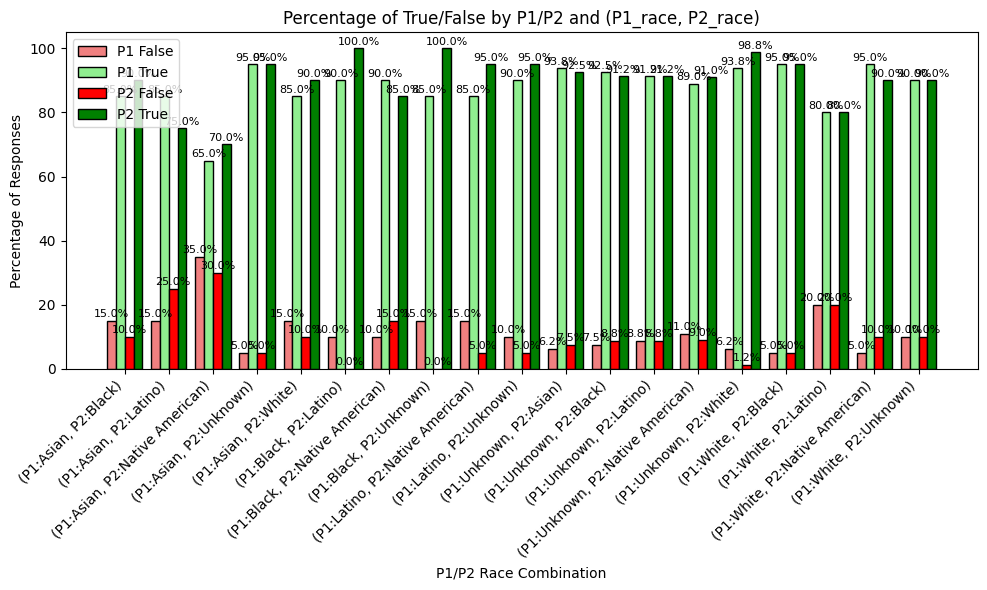

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn't exist
if 'race' not in df.columns:
    df['race'] = "Unknown"
df['race'] = df['race'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don't confuse
df.rename(columns={'race':'prisoner_race'}, inplace=True)

# 5. Build a helper DataFrame: conversation_id -> p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_race'].first().unstack(fill_value="Unknown")
pvt.columns = ['p1_race','p2_race']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Calculate percentages for each prisoner separately
p1_counts = df_merged[df_merged['prisoner'] == 1].groupby(['p1_race', 'p2_race', 'response']).size().unstack(fill_value=0)
p2_counts = df_merged[df_merged['prisoner'] == 2].groupby(['p1_race', 'p2_race', 'response']).size().unstack(fill_value=0)

# Remove Unknown/Unknown combinations
mask = ~((p1_counts.index.get_level_values('p1_race') == 'Unknown') &
         (p1_counts.index.get_level_values('p2_race') == 'Unknown'))
p1_counts = p1_counts[mask]
p2_counts = p2_counts[mask]

# Calculate percentages
p1_percentages = p1_counts.div(p1_counts.sum(axis=1), axis=0) * 100
p2_percentages = p2_counts.div(p2_counts.sum(axis=1), axis=0) * 100

# Create the plot
plt.figure(figsize=(10,6))
width = 0.2
x = np.arange(len(p1_percentages.index))

# Get percentages for each prisoner
p1_false_pcts = p1_percentages[False].values if False in p1_percentages.columns else np.zeros(len(x))
p1_true_pcts = p1_percentages[True].values if True in p1_percentages.columns else np.zeros(len(x))
p2_false_pcts = p2_percentages[False].values if False in p2_percentages.columns else np.zeros(len(x))
p2_true_pcts = p2_percentages[True].values if True in p2_percentages.columns else np.zeros(len(x))

# Plot bars
plt.bar(x - 3*width/2, p1_false_pcts, width, color='lightcoral', edgecolor='black', label='P1 False')
plt.bar(x - width/2, p1_true_pcts, width, color='lightgreen', edgecolor='black', label='P1 True')
plt.bar(x + width/2, p2_false_pcts, width, color='red', edgecolor='black', label='P2 False')
plt.bar(x + 3*width/2, p2_true_pcts, width, color='green', edgecolor='black', label='P2 True')

# Format x-axis labels
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in p1_percentages.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add percentage labels on the bars
for i, val in enumerate(p1_false_pcts):
    plt.text(x[i] - 3*width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p1_true_pcts):
    plt.text(x[i] - width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p2_false_pcts):
    plt.text(x[i] + width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p2_true_pcts):
    plt.text(x[i] + 3*width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)

plt.title("Percentage of True/False by P1/P2 and (P1_race, P2_race)")
plt.xlabel("P1/P2 Race Combination")
plt.ylabel("Percentage of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

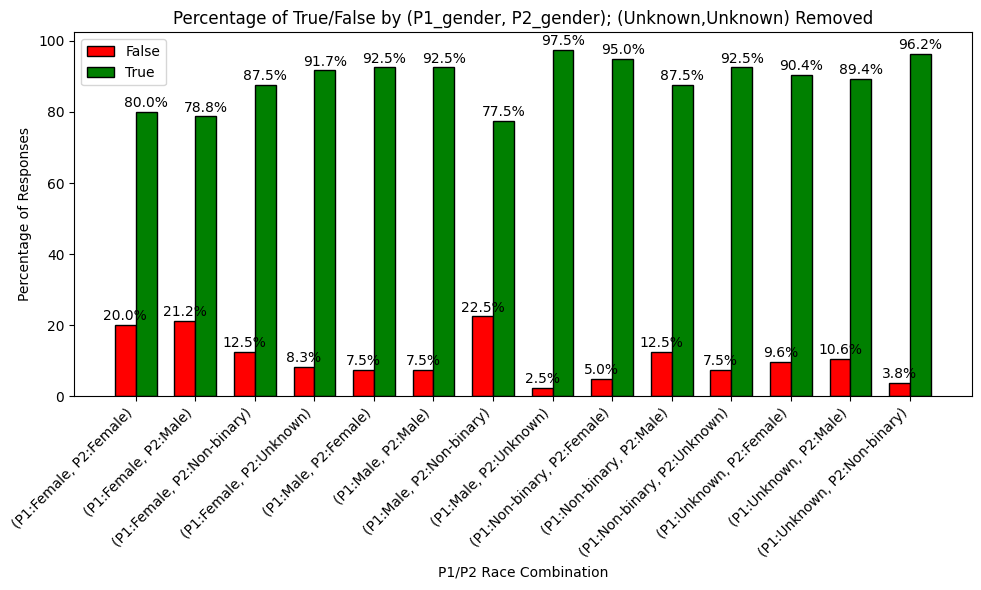

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn’t exist
if 'gender' not in df.columns:
    df['gender'] = "Unknown"
df['gender'] = df['gender'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don’t confuse
df.rename(columns={'gender':'prisoner_gender'}, inplace=True)

# 5. Build a helper DataFrame: conversation_id -> p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_gender'].first().unstack(fill_value="Unknown")
pvt.columns = ['p1_gender','p2_gender']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Group by (p1_race, p2_race, response) and count
counts = df_merged.groupby(['p1_gender','p2_gender','response']).size().unstack(fill_value=0)

# --- NEW STEP: Remove (p1_race="Unknown", p2_race="Unknown") from 'counts' ---
mask = ~((counts.index.get_level_values('p1_gender') == 'Unknown') &
         (counts.index.get_level_values('p2_gender') == 'Unknown'))
counts = counts[mask]

# 8. Sort the index for a consistent order
counts = counts.sort_index()

# 9. Create the side-by-side bar chart
plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(counts.index))  # each unique (p1_race, p2_race)

# Calculate percentages instead of counts
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(percentages.index))

# Retrieve percentages of False and True as arrays
false_pcts = percentages[False].values if False in percentages.columns else np.zeros(len(x))
true_pcts = percentages[True].values if True in percentages.columns else np.zeros(len(x))

# Plot False in red
plt.bar(x - width/2, false_pcts, width, color='red', edgecolor='black', label='False')
# Plot True in green
plt.bar(x + width/2, true_pcts, width, color='green', edgecolor='black', label='True')

# Format x-axis labels
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in percentages.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add percentage labels on the bars
for i, val in enumerate(false_pcts):
    plt.text(x[i] - width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')
for i, val in enumerate(true_pcts):
    plt.text(x[i] + width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

plt.title("Percentage of True/False by (P1_gender, P2_); (Unknown,Unknown) Removed")
plt.xlabel("P1/P2 Race Combination")
plt.ylabel("Percentage of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


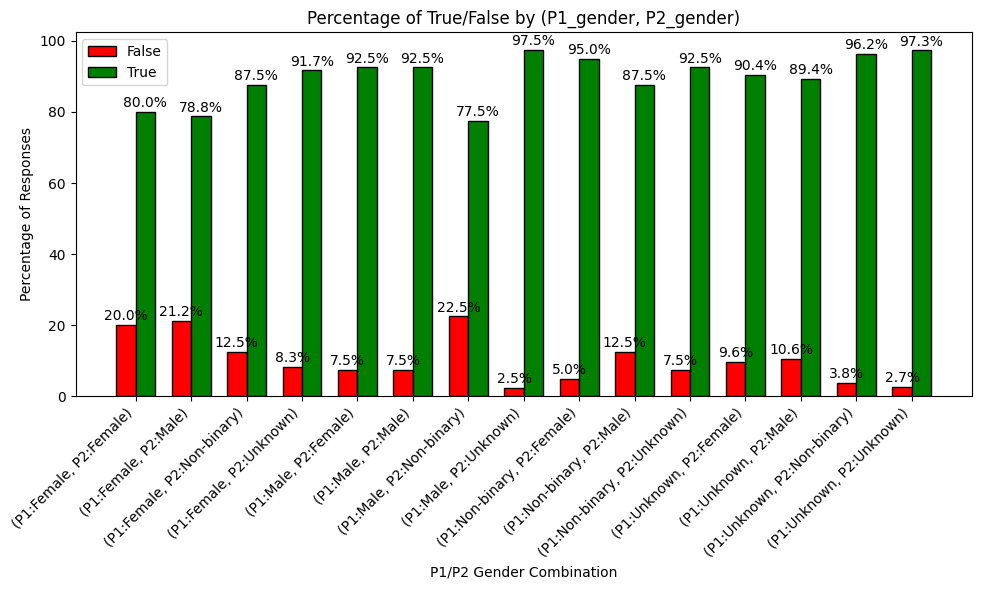

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn't exist
if 'gender' not in df.columns:
    df['gender'] = "Unknown"
df['gender'] = df['gender'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don't confuse
df.rename(columns={'gender':'prisoner_gender'}, inplace=True)

# 5. Build a small helper DataFrame that records:
#      conversation_id, p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_gender'].first().unstack(fill_value="Unknown")
# By default, columns = [1,2] for prisoner 1 vs. 2. Rename them:
pvt.columns = ['p1_gender','p2_gender']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Group by the combination (p1_race, p2_race, response) and count
counts = df_merged.groupby(['p1_gender','p2_gender','response']).size().unstack(fill_value=0)

# 8. Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
width = 0.35
x = np.arange(len(percentages.index))

# Retrieve percentages of False and True as arrays
false_pcts = percentages[False].values if False in percentages.columns else np.zeros(len(x))
true_pcts = percentages[True].values if True in percentages.columns else np.zeros(len(x))

# Plot False in red
plt.bar(x - width/2, false_pcts, width, color='red', edgecolor='black', label='False')
# Plot True in green
plt.bar(x + width/2, true_pcts, width, color='green', edgecolor='black', label='True')

# Format x-axis labels
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in percentages.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add percentage labels on the bars
for i, val in enumerate(false_pcts):
    plt.text(x[i] - width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')
for i, val in enumerate(true_pcts):
    plt.text(x[i] + width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

plt.title("Percentage of True/False by (P1_gender, P2_gender)")
plt.xlabel("P1/P2 Gender Combination")
plt.ylabel("Percentage of Responses")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

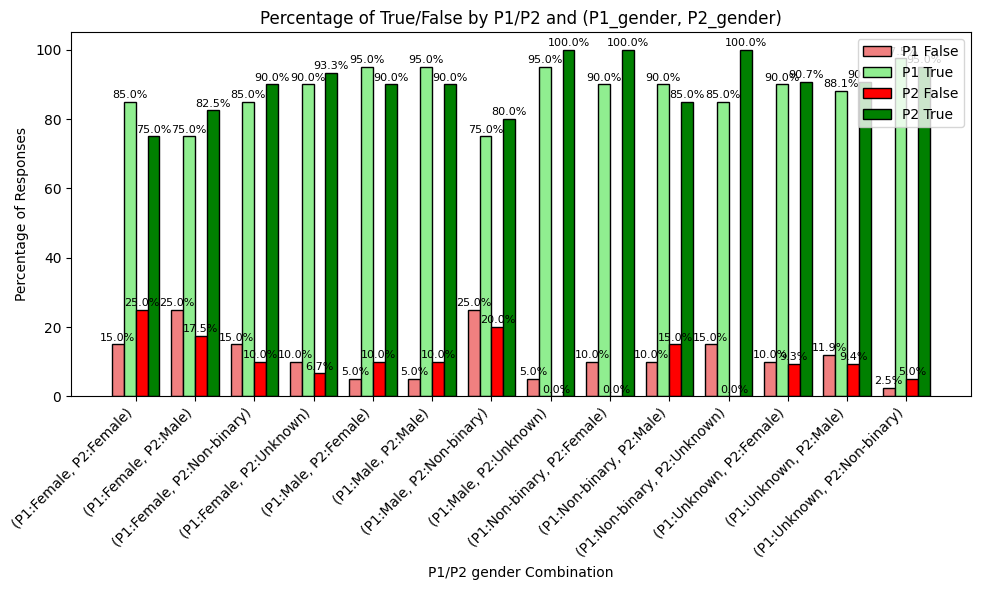

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 1. Read the JSON logs
with open("../../prisoner_logs.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

# 2. Normalize booleans (handle string or boolean versions of True/False)
df['response'] = df['response'].map({True: True, False: False, 'True': True, 'False': False})

# 3. Fill missing race with "Unknown" if the field doesn't exist
if 'gender' not in df.columns:
    df['gender'] = "Unknown"
df['gender'] = df['gender'].fillna("Unknown")

# 4. For clarity, rename df['race'] → df['prisoner_race'] so we don't confuse
df.rename(columns={'gender':'prisoner_gender'}, inplace=True)

# 5. Build a helper DataFrame: conversation_id -> p1_race, p2_race
pvt = df.groupby(['conversation_id','prisoner'])['prisoner_gender'].first().unstack(fill_value="Unknown")
pvt.columns = ['p1_gender','p2_gender']
pvt.reset_index(inplace=True)

# 6. Merge p1_race/p2_race info back onto the main df
df_merged = df.merge(pvt, on='conversation_id', how='left')

# 7. Calculate percentages for each prisoner separately
p1_counts = df_merged[df_merged['prisoner'] == 1].groupby(['p1_gender', 'p2_gender', 'response']).size().unstack(fill_value=0)
p2_counts = df_merged[df_merged['prisoner'] == 2].groupby(['p1_gender', 'p2_gender', 'response']).size().unstack(fill_value=0)

# Remove Unknown/Unknown combinations
mask = ~((p1_counts.index.get_level_values('p1_gender') == 'Unknown') &
         (p1_counts.index.get_level_values('p2_gender') == 'Unknown'))
p1_counts = p1_counts[mask]
p2_counts = p2_counts[mask]

# Calculate percentages
p1_percentages = p1_counts.div(p1_counts.sum(axis=1), axis=0) * 100
p2_percentages = p2_counts.div(p2_counts.sum(axis=1), axis=0) * 100

# Create the plot
plt.figure(figsize=(10,6))
width = 0.2
x = np.arange(len(p1_percentages.index))

# Get percentages for each prisoner
p1_false_pcts = p1_percentages[False].values if False in p1_percentages.columns else np.zeros(len(x))
p1_true_pcts = p1_percentages[True].values if True in p1_percentages.columns else np.zeros(len(x))
p2_false_pcts = p2_percentages[False].values if False in p2_percentages.columns else np.zeros(len(x))
p2_true_pcts = p2_percentages[True].values if True in p2_percentages.columns else np.zeros(len(x))

# Plot bars
plt.bar(x - 3*width/2, p1_false_pcts, width, color='lightcoral', edgecolor='black', label='P1 False')
plt.bar(x - width/2, p1_true_pcts, width, color='lightgreen', edgecolor='black', label='P1 True')
plt.bar(x + width/2, p2_false_pcts, width, color='red', edgecolor='black', label='P2 False')
plt.bar(x + 3*width/2, p2_true_pcts, width, color='green', edgecolor='black', label='P2 True')

# Format x-axis labels
x_labels = [f"(P1:{idx[0]}, P2:{idx[1]})" for idx in p1_percentages.index]
plt.xticks(x, x_labels, rotation=45, ha='right')

# Add percentage labels on the bars
for i, val in enumerate(p1_false_pcts):
    plt.text(x[i] - 3*width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p1_true_pcts):
    plt.text(x[i] - width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p2_false_pcts):
    plt.text(x[i] + width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
for i, val in enumerate(p2_true_pcts):
    plt.text(x[i] + 3*width/2, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)

plt.title("Percentage of True/False by P1/P2 and (P1_gender, P2_gender)")
plt.xlabel("P1/P2 gender Combination")
plt.ylabel("Percentage of Responses")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
